# Calculating Periodograms and Applying Time-Series Filters in Python

Get data from FRED on seasonally unadjusted industrial production at monthly frequencies.

In [1]:
import pandas_datareader.data as web
import datetime
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# set start and end dates
start = datetime.datetime(1919, 1, 1)
end = datetime.datetime(2017, 1, 1)

# download data from FRED using pandas datareader
# this series is seasonally unadjusted industrial production at monthly frequencies
IP = web.DataReader("IPB50001N", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
IP = IP.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logIP = np.log(IP.values)

Next, let's take the periodogram using scipy's signal package.  We make sure that axis=0, so that rows are treated as observations over time.

In [2]:
IPfreq, IPper = sig.periodogram(logIP, axis=0)

Now let's plot this.  We throw away the first observation which is associated with the lowest freqency at a wavelength of infinity.  For scaling purposes we plot the natural log of the periodogram.

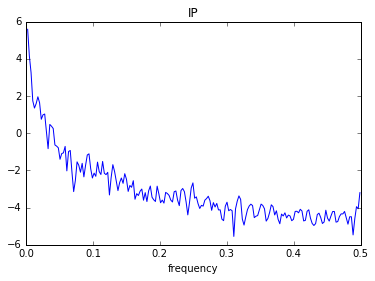

In [3]:
plt.plot(IPfreq[1:], np.log(IPper[1:]))
plt.title('IP')
plt.xlabel('frequency')
plt.show()

We will plot the data over time too, for comparison.

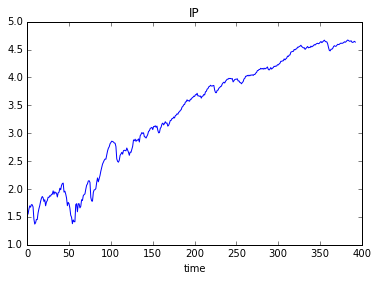

In [4]:
plt.plot(logIP)
plt.title('IP')
plt.xlabel('time')
plt.show()

Filter this data with the HP filter.

In [5]:
IPcy, IPtr = sm.tsa.filters.hpfilter(logIP, 1600)

Recalculate the periodogram on the filtered cyclical component and plot this.

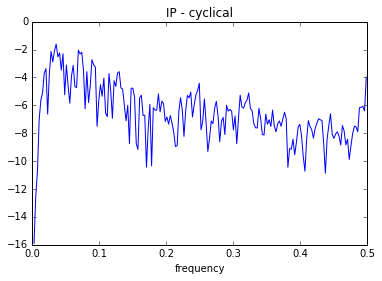

In [6]:
IPfreq, IPcyper = sig.periodogram(IPcy, axis=0)

plt.plot(IPfreq[1:], np.log(IPcyper[1:]))
plt.title('IP - cyclical')
plt.xlabel('frequency')
plt.show()

Calculate and plot the ratio of the unflitered periodogram to the filtered one.  This gives a rough picture of the "gain' of the HP filter at $\lambda$ = 1600.

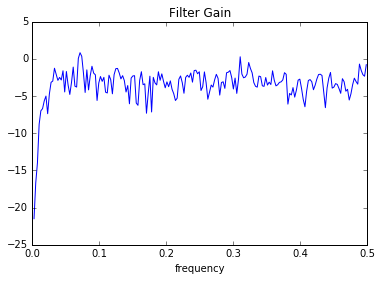

In [7]:
nobs = IPcyper.size
gain = np.zeros(nobs)
for i in range(0, nobs):
    gain[i] = IPcyper[i] / IPper[i,0]

plt.plot(IPfreq[1:], np.log(gain[1:]))
plt.title('Filter Gain')
plt.xlabel('frequency')
plt.show()

Plot unfiltered data and the HP trend.

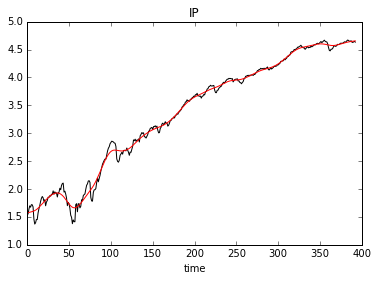

In [8]:
plt.plot(range(IPtr.size), logIP, 'k-',
         range(IPtr.size), IPtr, 'r-')
plt.title('IP')
plt.xlabel('time')
plt.show()

Plot the cyclical component

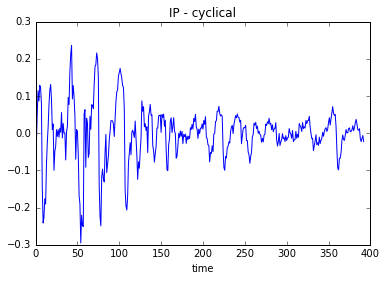

In [9]:
plt.plot(IPcy)
plt.title('IP - cyclical')
plt.xlabel('time')
plt.show()